In [26]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [27]:
def cdf(x):
    return max(min(((x-900)**2)/10000, 1),0)
def inverse_cdf(x):
    return 900+100*np.sqrt(x)

In [36]:
#simulate for each price pairing and calculate mean and variance of profits across N_SIMULATIONS simulations

N_GOLDFISH = 1000
N_SIMULATIONS = 1000
results = []
profits = {}
for _ in tqdm(range(N_SIMULATIONS), desc="Simulating..."):
    #draw N_GOLDFISH samples from the reserve price distribution
    total_profit = 0
    uniform_samples = np.random.uniform(0, 1, N_GOLDFISH)
    res_prices = np.array([inverse_cdf(u) for u in uniform_samples])
    #iterate over all reasonable price pairs
    for p1 in range(901, 999):
        for p2 in range(p1+1, 1000):
            #calculate profits for current simulation iteration and record mean, variance, and price pair
            total_profit = 0
            for i in range(N_GOLDFISH):
                if res_prices[i] < p1:
                    total_profit += 1000 - p1
                elif res_prices[i] < p2:
                    total_profit += 1000 - p2
                else:
                    total_profit += 0
            pair = (p1, p2)
            if pair not in profits:
                profits[pair] = []
            profits[pair].append(total_profit)
for pair in tqdm(profits, desc="Calculating results..."):
    mean_profit = np.mean(profits[pair])
    variance = np.var(profits[pair])
    results.append((mean_profit, variance, pair))       
# # order results by mean profit descending
results = sorted(results, key=lambda x: x[0], reverse=True)

Calculating results...: 100%|██████████| 4851/4851 [00:00<00:00, 10636.62it/s]


Top 10 price pairings:
Price Pairing: (952, 978), Mean Profit: 20404, Variance: 374540
Price Pairing: (951, 978), Mean Profit: 20397, Variance: 377025
Price Pairing: (952, 979), Mean Profit: 20394, Variance: 364333
Price Pairing: (953, 979), Mean Profit: 20393, Variance: 357935
Price Pairing: (953, 978), Mean Profit: 20392, Variance: 368039
Price Pairing: (951, 977), Mean Profit: 20388, Variance: 389433
Price Pairing: (952, 977), Mean Profit: 20385, Variance: 387119
Price Pairing: (954, 979), Mean Profit: 20381, Variance: 355129
Price Pairing: (950, 977), Mean Profit: 20377, Variance: 395504
Price Pairing: (951, 979), Mean Profit: 20377, Variance: 367098


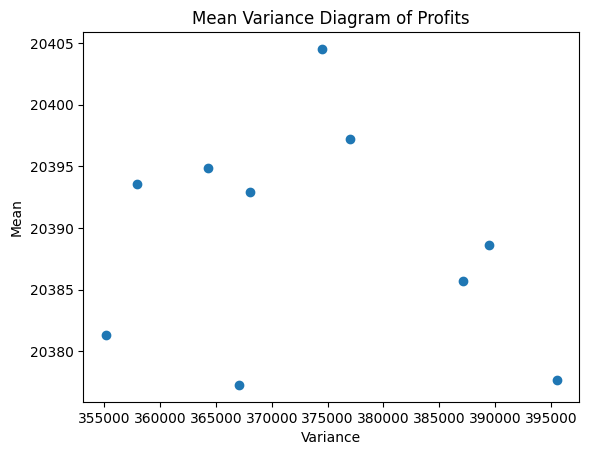

In [37]:
n = 10
print(f"Top {n} price pairings:")
for i in range(n):
    print(f"Price Pairing: {results[i][2]}, Mean Profit: {int(results[i][0])}, Variance: {int(results[i][1])}")
        
#plot the mean variance diagram of profits for top n
means = [r[0] for r in results[:n]]
variances = [r[1] for r in results[:n]]
plt.scatter(variances, means)
plt.xlabel("Variance")
plt.ylabel("Mean")
plt.title("Mean Variance Diagram of Profits")
#label points with 5 highest means
plt.show()